In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('Employee_2.csv')

In [3]:
dataset.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,171369.0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,136993.0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,113807.0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,166478.0
4,Masters,2017,NaN,3,24,Male,Yes,2,1,393136.0


In [5]:
dataset.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Salary
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1798.000000
mean,2015.076923,2.695075,26.310459,3.228002,0.362479,224240.323693
std,1.854077,0.564248,2.142854,1.302112,0.480849,100823.365853
min,2012.000000,1.000000,22.000000,0.000000,0.000000,50135.000000
25%,2013.000000,2.000000,25.000000,2.000000,0.000000,137712.250000
50%,2015.000000,3.000000,26.000000,3.000000,0.000000,226605.500000
75%,2017.000000,3.000000,27.000000,4.000000,1.000000,309474.000000
max,2018.000000,3.000000,40.000000,5.000000,1.000000,399785.000000


In [18]:
print("\n--- Summary Statistics ---")

# Mean
print("\nMean values:")
print(dataset[['Age', 'Salary']].mean())

# Median
print("\nMedian values:")
print(dataset[['Age', 'Salary']].median())

# Minimum
print("\nMinimum values:")
print(dataset[['Age', 'Salary']].min())


--- Summary Statistics ---

Mean values:
Age           26.310459
Salary    224240.323693
dtype: float64

Median values: Age    26.0
dtype: float64

Minimum values:
Age          22.0
Salary    50135.0
dtype: float64


In [19]:
bins = [18,25,35,45,60]
labels = ['18-25','25-35','35-45','45-60']

dataset['Age_groups'] = pd.cut(dataset['Age'],bins=bins,labels=labels)

agewise_income_sum = dataset.groupby('Age_groups',observed=True)['Salary'].sum()

agewise_income_mean = dataset.groupby('Age_groups',observed=True)['Salary'].mean()

agewise_income_median = dataset.groupby('Age_groups',observed=True)['Salary'].median()

print("\nagewise_income_sum :",agewise_income_sum)
print("\nagewise_income_mean : ",agewise_income_mean)
print("\nagewise_income_median : ",agewise_income_median)


agewise_income_sum : Age_groups
18-25    151769385.0
25-35    246390309.0
35-45      5024408.0
Name: Salary, dtype: float64

agewise_income_mean :  Age_groups
18-25    225847.299107
25-35    223991.190000
35-45    193246.461538
Name: Salary, dtype: float64

agewise_income_median :  Age_groups
18-25    232190.0
25-35    226226.0
35-45    162553.5
Name: Salary, dtype: float64


In [7]:
dataset.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary,Age_groups
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,171369.0,25-35
1,Bachelors,2013,Pune,1,28,Female,No,3,1,136993.0,25-35
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,113807.0,35-45
3,Masters,2016,Bangalore,3,27,Male,No,5,1,166478.0,25-35
4,Masters,2017,NaN,3,24,Male,Yes,2,1,393136.0,18-25


In [4]:
dataset['City'].value_counts()
dataset['Education'].value_counts()
dataset['JoiningYear'].value_counts()
dataset['PaymentTier'].value_counts()
dataset['Gender'].value_counts()
# dataset['Age_groups'].value_counts()



Gender
Male      1071
Female     728
Name: count, dtype: int64

In [9]:
#rename a column
dataset = dataset.rename(columns ={'LeaveOrNot':'OnLeave'})

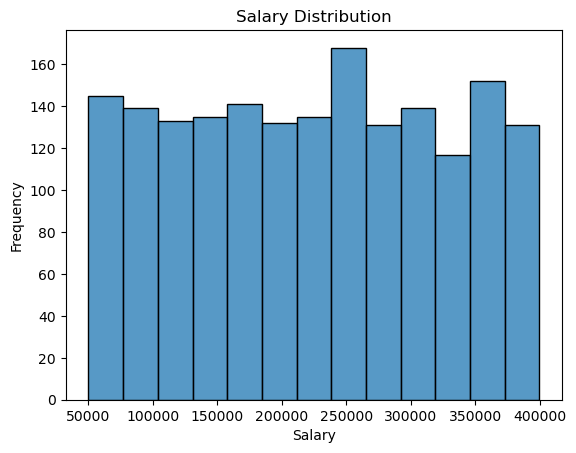

In [8]:
# Assuming 'dataset' is your DataFrame and it contains a 'Salary' column
sns.histplot(dataset['Salary'])

# Add title and labels
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Distribution of Age Groups')

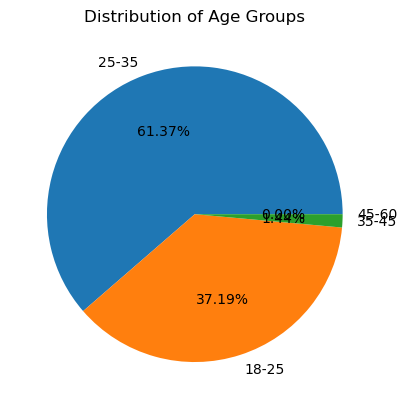

In [11]:
age_groups_count = dataset['Age_groups'].value_counts()

# Plot pie chart
plt.pie(age_groups_count,labels=age_groups_count.index,autopct='%1.2f%%')
plt.title('Distribution of Age Groups')